# Alex's Personal Notebook

Details will go here eventually.

To Do:
- 7/25 - 7/26: Clean data individually
- 7/25 - 7/26: Clean data with team
- 7/25 - 7/26: Explore data
- 7/26:        Define business questions
- 7/26:        Start analysis
- ...
- 7/31:        Finalize project
- 8/01:        Polish and present with team
- 8/02:        Present to Deloitte

## Starting exploration

**Importing the Data**

The data files were compressed and stored in different formats. The first step, then, is to decompress them and determine how to parse their structures.

- bom.movie_gross.csv.gz
- im.db.zip
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz       <-- This one is encoded with ANSI
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

Using pandas, we should be able to read the zipped files directly into dataframes.

In [50]:
# imports
import numpy as np
import pandas as pd
import sqlite3
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# read the files into dataframes

movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# create temporary SQL database from im.db.zip

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as z:
    z.printdir()
    imdb_data = z.extractall()

# open SQL link to im.db.zip

conn = sqlite3.connect('im.db')

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328


## Basic info on the imported data

In [6]:
# exploring movie_gross

movie_gross.head()

# title	studio	domestic_gross	foreign_gross	year
# 0	Toy Story 3	BV	415000000.0	652000000	2010
# 1	Alice in Wonderland (2010)	BV	334200000.0	691300000	2010
# 2	Harry Potter and the Deathly Hallows Part 1	WB	296000000.0	664300000	2010
# 3	Inception	WB	292600000.0	535700000	2010
# 4	Shrek Forever After	P/DW	238700000.0	513900000	2010

movie_gross.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3387 entries, 0 to 3386
# Data columns (total 5 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   title           3387 non-null   object 
#  1   studio          3382 non-null   object 
#  2   domestic_gross  3359 non-null   float64
#  3   foreign_gross   2037 non-null   object 
#  4   year            3387 non-null   int64  
# dtypes: float64(1), int64(1), object(3)
# memory usage: 132.4+ KB

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
movie_info.head()

# id	synopsis	rating	genre	director	writer	theater_date	dvd_date	currency	box_office	runtime	studio
# 0	1	This gritty, fast-paced, and innovative police...	R	Action and Adventure|Classics|Drama	William Friedkin	Ernest Tidyman	Oct 9, 1971	Sep 25, 2001	NaN	NaN	104 minutes	NaN
# 1	3	New York City, not-too-distant-future: Eric Pa...	R	Drama|Science Fiction and Fantasy	David Cronenberg	David Cronenberg|Don DeLillo	Aug 17, 2012	Jan 1, 2013	$	600,000	108 minutes	Entertainment One
# 2	5	Illeana Douglas delivers a superb performance ...	R	Drama|Musical and Performing Arts	Allison Anders	Allison Anders	Sep 13, 1996	Apr 18, 2000	NaN	NaN	116 minutes	NaN
# 3	6	Michael Douglas runs afoul of a treacherous su...	R	Drama|Mystery and Suspense	Barry Levinson	Paul Attanasio|Michael Crichton	Dec 9, 1994	Aug 27, 1997	NaN	NaN	128 minutes	NaN
# 4	7	NaN	NR	Drama|Romance	Rodney Bennett	Giles Cooper	NaN	NaN	NaN	NaN	200 minutes	NaN

movie_info.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1560 entries, 0 to 1559
# Data columns (total 12 columns):
#  #   Column        Non-Null Count  Dtype 
# ---  ------        --------------  ----- 
#  0   id            1560 non-null   int64 
#  1   synopsis      1498 non-null   object
#  2   rating        1557 non-null   object
#  3   genre         1552 non-null   object
#  4   director      1361 non-null   object
#  5   writer        1111 non-null   object
#  6   theater_date  1201 non-null   object
#  7   dvd_date      1201 non-null   object
#  8   currency      340 non-null    object
#  9   box_office    340 non-null    object
#  10  runtime       1530 non-null   object
#  11  studio        494 non-null    object
# dtypes: int64(1), object(11)
# memory usage: 146.4+ KB

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
reviews.head()

# 	id	review	rating	fresh	critic	top_critic	publisher	date
# 0	3	A distinctly gallows take on contemporary fina...	3/5	fresh	PJ Nabarro	0	Patrick Nabarro	November 10, 2018
# 1	3	It's an allegory in search of a meaning that n...	NaN	rotten	Annalee Newitz	0	io9.com	May 23, 2018
# 2	3	... life lived in a bubble in financial dealin...	NaN	fresh	Sean Axmaker	0	Stream on Demand	January 4, 2018
# 3	3	Continuing along a line introduced in last yea...	NaN	fresh	Daniel Kasman	0	MUBI	November 16, 2017
# 4	3	... a perverse twist on neorealism...	NaN	fresh	NaN	0	Cinema Scope	October 12, 2017

reviews.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 54432 entries, 0 to 54431
# Data columns (total 8 columns):
#  #   Column      Non-Null Count  Dtype 
# ---  ------      --------------  ----- 
#  0   id          54432 non-null  int64 
#  1   review      48869 non-null  object
#  2   rating      40915 non-null  object
#  3   fresh       54432 non-null  object
#  4   critic      51710 non-null  object
#  5   top_critic  54432 non-null  int64 
#  6   publisher   54123 non-null  object
#  7   date        54432 non-null  object
# dtypes: int64(2), object(6)
# memory usage: 3.3+ MB

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
movies.head()

# Unnamed: 0	genre_ids	id	original_language	original_title	popularity	release_date	title	vote_average	vote_count
# 0	0	[12, 14, 10751]	12444	en	Harry Potter and the Deathly Hallows: Part 1	33.533	2010-11-19	Harry Potter and the Deathly Hallows: Part 1	7.7	10788
# 1	1	[14, 12, 16, 10751]	10191	en	How to Train Your Dragon	28.734	2010-03-26	How to Train Your Dragon	7.7	7610
# 2	2	[12, 28, 878]	10138	en	Iron Man 2	28.515	2010-05-07	Iron Man 2	6.8	12368
# 3	3	[16, 35, 10751]	862	en	Toy Story	28.005	1995-11-22	Toy Story	7.9	10174
# 4	4	[28, 878, 12]	27205	en	Inception	27.920	2010-07-16	Inception	8.3	22186

movies.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 26517 entries, 0 to 26516
# Data columns (total 10 columns):
#  #   Column             Non-Null Count  Dtype  
# ---  ------             --------------  -----  
#  0   Unnamed: 0         26517 non-null  int64  
#  1   genre_ids          26517 non-null  object 
#  2   id                 26517 non-null  int64  
#  3   original_language  26517 non-null  object 
#  4   original_title     26517 non-null  object 
#  5   popularity         26517 non-null  float64
#  6   release_date       26517 non-null  object 
#  7   title              26517 non-null  object 
#  8   vote_average       26517 non-null  float64
#  9   vote_count         26517 non-null  int64  
# dtypes: float64(2), int64(3), object(5)
# memory usage: 2.0+ MB

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
movie_budgets.head()

# 	id	release_date	movie	production_budget	domestic_gross	worldwide_gross
# 0	1	Dec 18, 2009	Avatar	$425,000,000	$760,507,625	$2,776,345,279
# 1	2	May 20, 2011	Pirates of the Caribbean: On Stranger Tides	$410,600,000	$241,063,875	$1,045,663,875
# 2	3	Jun 7, 2019	Dark Phoenix	$350,000,000	$42,762,350	$149,762,350
# 3	4	May 1, 2015	Avengers: Age of Ultron	$330,600,000	$459,005,868	$1,403,013,963
# 4	5	Dec 15, 2017	Star Wars Ep. VIII: The Last Jedi	$317,000,000	$620,181,382	$1,316,721,747

movie_budgets.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 5782 entries, 0 to 5781
# Data columns (total 6 columns):
#  #   Column             Non-Null Count  Dtype 
# ---  ------             --------------  ----- 
#  0   id                 5782 non-null   int64 
#  1   release_date       5782 non-null   object
#  2   movie              5782 non-null   object
#  3   production_budget  5782 non-null   object
#  4   domestic_gross     5782 non-null   object
#  5   worldwide_gross    5782 non-null   object
# dtypes: int64(1), object(5)
# memory usage: 271.2+ KB

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [37]:
# explore im.db

pd.read_sql("""
    SELECT name
      FROM 'sqlite_master'
     WHERE type = 'table'
  ;
""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


**im.bd ERD**
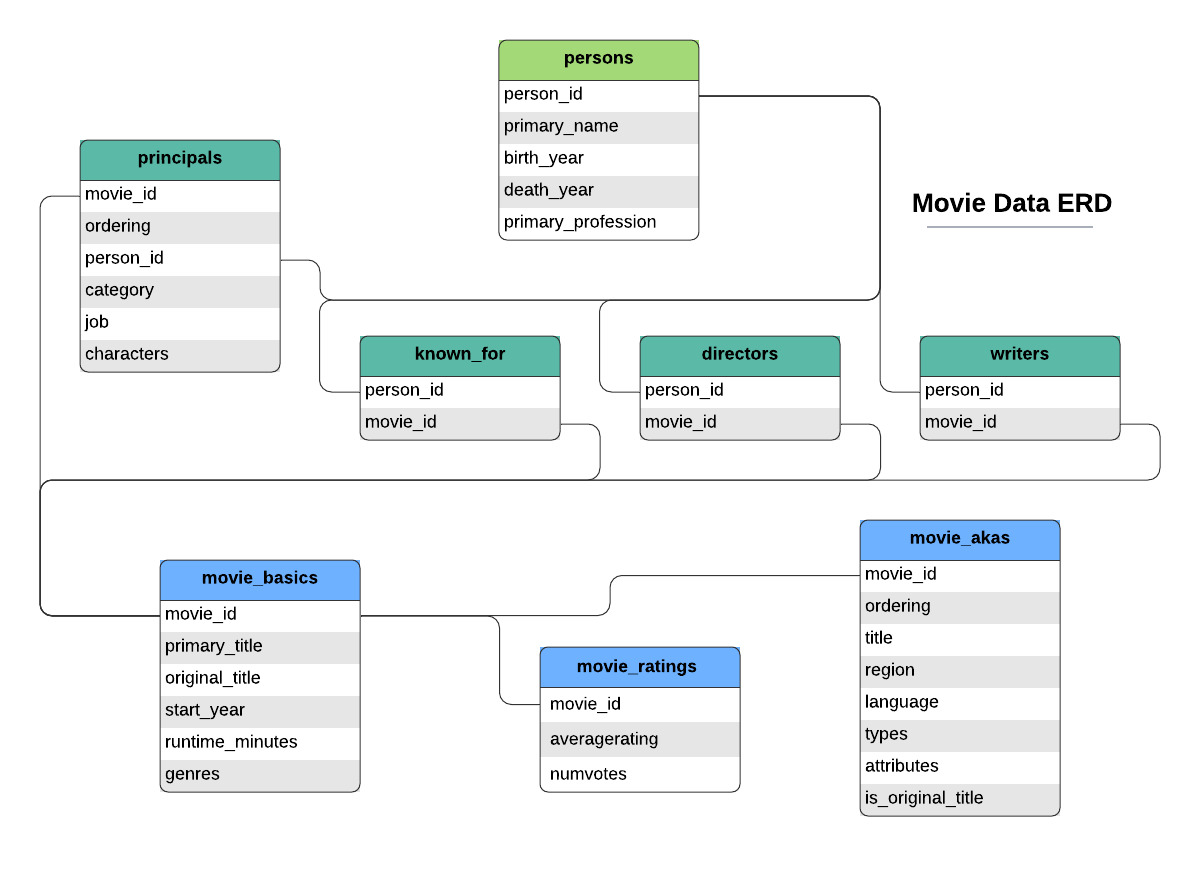

# Exploration Keynotes

### movie_gross

This csv imported with 3387 rows. The 5 columns are title, studio, domestic_gross, foreign_gross, and year. Of these, only title and year were complete. studio and domestic_gross were effectively complete (only having a few null values), but foreign_gross was missing from > 1/3 of the rows. The data spans the years of 2010-2018.

Foreign_gross was initially formatted as string objects, but was recast as floats. The question remains what to do with the NaN values, though.

The values for domestic_gross taper off towards the end each year, implying that the data is pre-sorted by domestic_gross. This is also true of foreign_gross, giving the frame an internal two-level sort on domestic_gross and foreign_gross descending.

There are many missing values in the foreign_gross column and some in the domestic_gross column. It is unclear if these represent a lack of data or the fact that the movie did not make any money in that market. Since there are no values of 0 in either column, it is likely a lack of revenue and is therefore significant. The most reasonable course of action, then, might be to replace the NaN values in those columns with 0's.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 3387 entries, 0 to 3386
    Data columns (total 5 columns):
    . #   Column          Non-Null Count  Dtype  
    ---  ------          --------------  -----  
     0   title           3387 non-null   object 
     1   studio          3382 non-null   object 
     2   domestic_gross  3359 non-null   float64
     3   foreign_gross   2037 non-null   object 
     4   year            3387 non-null   int64  
    dtypes: float64(1), int64(1), object(3)
    memory usage: 132.4+ KB

In [ ]:
# cleaning movie_gross

# convert foreign_gross from strings to floats
movie_gross["foreign_gross"] = movie_gross.foreign_gross.str.replace(",", "").astype('float')

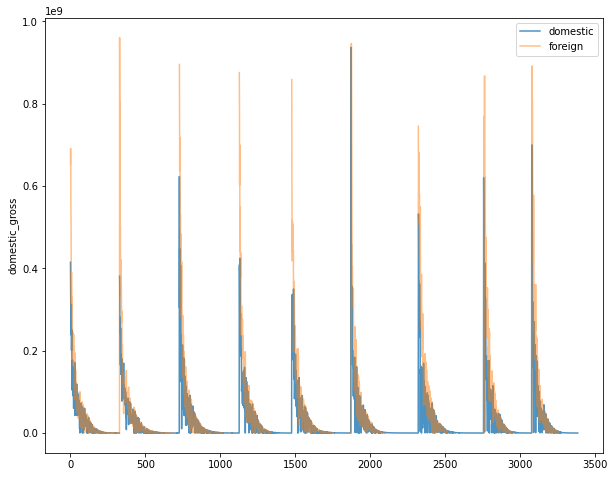

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=movie_gross.index, y=movie_gross["domestic_gross"], alpha=0.8, ax=ax, label='domestic')
sns.lineplot(x=movie_gross.index, y=movie_gross["foreign_gross"], 
             alpha=0.5, ax=ax, label='foreign');

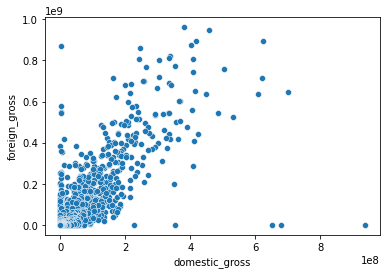

In [71]:
sns.scatterplot(x=movie_gross["domestic_gross"], y=movie_gross["foreign_gross"]);

### movie_info

This tsv imported with 1560 rows. The 12 columns are id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and studio. Several of the columns have significant amounts of missing values, including currency, box_office, and studio. Since none of these three carried a significant amount of information, these columns were ignored.

Ratings were strings in the set ['G', 'PG', 'PG-13', 'R', 'NC17', 'NR'].
Genre included all applicable genres and was pipe-separated (i.e. 'Comedy|Drama')
All runtimes are given in minutes.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1560 entries, 0 to 1559
    Data columns (total 12 columns):
    . #   Column        Non-Null Count  Dtype 
    ---  ------        --------------  ----- 
     0   id            1560 non-null   int64 
     1   synopsis      1498 non-null   object
     2   rating        1557 non-null   object
     3   genre         1552 non-null   object
     4   director      1361 non-null   object
     5   writer        1111 non-null   object
     6   theater_date  1201 non-null   object
     7   dvd_date      1201 non-null   object
     8   currency      340 non-null    object
     9   box_office    340 non-null    object
     10  runtime       1530 non-null   object
     11  studio        494 non-null    object
    dtypes: int64(1), object(11)
    memory usage: 146.4+ KB

In [144]:
# movie_info.head()
# movie_info[movie_info['studio'].]
np.unique([tim.split()[1] for tim in movie_info[movie_info['runtime'].notna()]['runtime']])

array(['minutes'], dtype='<U7')

In [117]:
movie_info.iloc[6]['runtime'].split()[1]

'minutes'

In [ ]:
# clean movie_info

# drop currency, box_office, and studio


# transform theater_date and dvd_date from strings to datetime objects.


# change runtimes from string to float and label as runtime_minutes

